# Imports

In [106]:
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from datetime import datetime

# Getting data

In [107]:
data = "seattle-weather.csv"
dataset = read_csv(data)#names=names)
dataset.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


## Arranging our data for training

In [108]:
print("DF Dimensions:", dataset.shape)
dataset.dtypes

DF Dimensions: (1461, 6)


date              object
precipitation    float64
temp_max         float64
temp_min         float64
wind             float64
weather           object
dtype: object

### dealing with date

In [109]:
# Splitting date from the - symbol
dateDF = dataset['date']
dateDF = dateDF.str.split('-',expand=True)
dateDF = dateDF.rename(columns={0:'Year',1:'Month',2:'Day'})
dateDF.head()


,Year,Month,Day
0,2012,01,01
1,2012,01,02
2,2012,01,03
3,2012,01,04
4,2012,01,05


In [110]:
#concat new dates with main features
from pandas import concat
print(dataset.iloc[:,1:])
weatherDF = concat([dateDF,dataset.iloc[:,1:]],join='outer',axis=1)
weatherDF

      precipitation  temp_max  temp_min  wind  weather
0               0.0      12.8       5.0   4.7  drizzle
1              10.9      10.6       2.8   4.5     rain
2               0.8      11.7       7.2   2.3     rain
3              20.3      12.2       5.6   4.7     rain
4               1.3       8.9       2.8   6.1     rain
...             ...       ...       ...   ...      ...
1456            8.6       4.4       1.7   2.9     rain
1457            1.5       5.0       1.7   1.3     rain
1458            0.0       7.2       0.6   2.6      fog
1459            0.0       5.6      -1.0   3.4      sun
1460            0.0       5.6      -2.1   3.5      sun

[1461 rows x 5 columns]


,Year,Month,Day,precipitation,temp_max,temp_min,wind,weather
0,2012,01,01,0.0,12.8,5.0,4.7,drizzle
1,2012,01,02,10.9,10.6,2.8,4.5,rain
2,2012,01,03,0.8,11.7,7.2,2.3,rain
3,2012,01,04,20.3,12.2,5.6,4.7,rain
4,2012,01,05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...,...,...
1456,2015,12,27,8.6,4.4,1.7,2.9,rain
1457,2015,12,28,1.5,5.0,1.7,1.3,rain
1458,2015,12,29,0.0,7.2,0.6,2.6,fog
1459,2015,12,30,0.0,5.6,-1.0,3.4,sun


### Setting up Data from X and Y and training

In [111]:
array = weatherDF.values
X = array[:,1:-1]
y = array[:,-1]

X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)

# Create models To be used

### Choose what model to use

In [112]:
#setting models in a array
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [113]:
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.821913 (0.035188)
LDA: 0.726857 (0.042386)
KNN: 0.708893 (0.029005)
CART: 0.768899 (0.029730)
NB: 0.846751 (0.029990)
SVM: 0.715746 (0.039086)


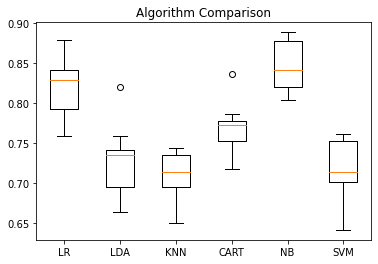

In [114]:
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

Logistic regression and GaussianNB are the best models 

In [115]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

model = GaussianNB()
model.fit(X_train, Y_train)
print(type(X_validation[0]))
predictions = model.predict(X_validation)
print(type(X_validation[0]))

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
0.825938566552901
[[  2   0   0   0   9]
 [  2   0   0   0  27]
 [  0   0 120   1   7]
 [  0   0   2   4   0]
 [  1   2   0   0 116]]
              precision    recall  f1-score   support

     drizzle       0.40      0.18      0.25        11
         fog       0.00      0.00      0.00        29
        rain       0.98      0.94      0.96       128
        snow       0.80      0.67      0.73         6
         sun       0.73      0.97      0.83       119

    accuracy                           0.83       293
   macro avg       0.58      0.55      0.55       293
weighted avg       0.76      0.83      0.78       293



In [118]:
from numpy import array 
inputData = array([['9','4',10.9,10.6,2.8,4.5]],dtype=float)#.reshape(-1,1)
modelTest = GaussianNB()
modelTest.fit(X_train, Y_train)
predictionsTest = modelTest.predict(inputData)
print(predictionsTest)
# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

['rain']
0.825938566552901
[[  2   0   0   0   9]
 [  2   0   0   0  27]
 [  0   0 120   1   7]
 [  0   0   2   4   0]
 [  1   2   0   0 116]]
              precision    recall  f1-score   support

     drizzle       0.40      0.18      0.25        11
         fog       0.00      0.00      0.00        29
        rain       0.98      0.94      0.96       128
        snow       0.80      0.67      0.73         6
         sun       0.73      0.97      0.83       119

    accuracy                           0.83       293
   macro avg       0.58      0.55      0.55       293
weighted avg       0.76      0.83      0.78       293

